# LL file creation notebook


This notebook will create the final version of the data that can be analysed for chapter 2/circadian disruption project. The data needs to be checked that the LDR is fine, and then annotated and saved. 

Explicit steps as follows: 
1. Import data  
2. Visualise data  
3. Remap the LDR so high = 200, low =0 <- may involve fixing any errors
4. Find the transitions between the conditions 
5. Label the different conditions in the light_period column
6. save the data 


In [1]:
import pathlib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import actigraphy_analysis.actogram_plot as act


In [2]:
# set some constants 
chamber = "6A"
label_col = "light_period"
def quickplot(data):
    data.plot(subplots=True,
              figsize=(20,10))

### Step One - Import the data

In [3]:
input_dir = pathlib.Path("/Users/angusfisk/Documents/01_PhD_files/"
                         "09_pirdata/03_experiment_files")
file_name = "exp_9_6A_pir_data.csv"
file_path = input_dir / file_name
data = pd.read_csv(file_path,
                   index_col=0,
                   parse_dates=True)

In [4]:
# fix a few required settings in the dataframe
# sort index
# remove chamber column 
data.sort_index(inplace=True)
chamber_col = data.pop(chamber)

In [5]:
cols = ["ll1",
       "ll2",
       "ll3",
       "ll4",
       "ll5",
       "ll6",
       "LDR"]
data.columns = cols

### Step Two - Visualise the data 

Check to see if any obvious errors, especially in the LDR

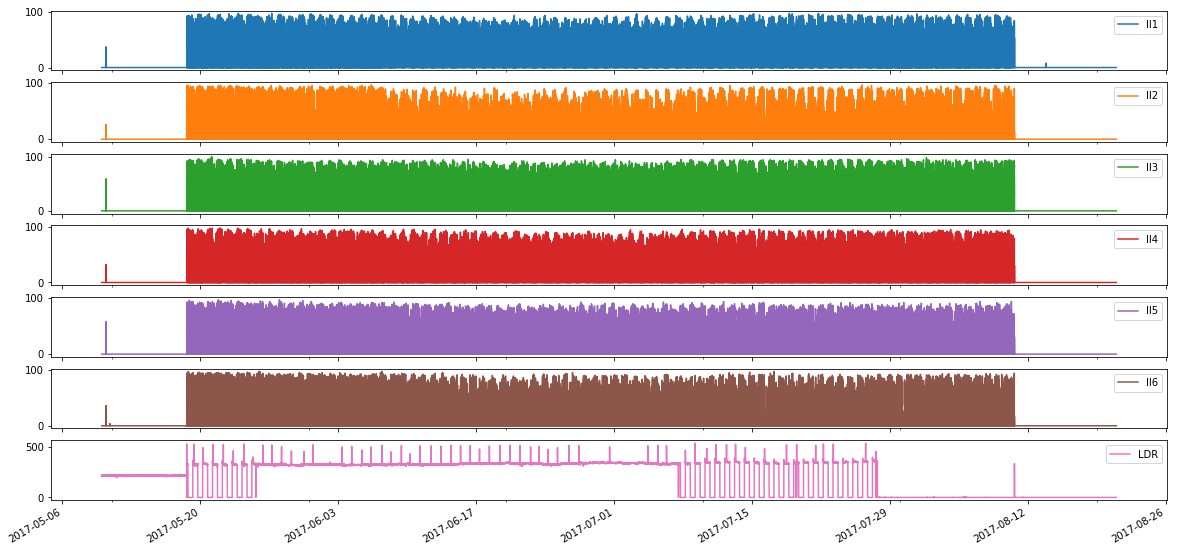

In [6]:
quickplot(data)

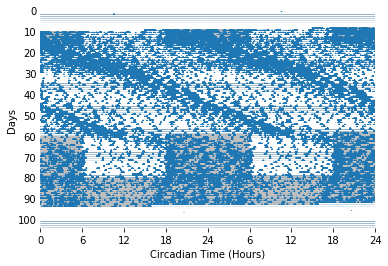

In [7]:
act.actogram_plot_from_df(data, 
                          animal_number=0,
                          period="24H",
                          showfig=True)

Conclusion?

no issue with the LDR!!!! all working

### Step Three - remap LDR?

Select the LDR for the first week of normal LD (day ~34 onwards)  
copy over the remaining days   
set the remaining LDR days to 0  

In [8]:
# activity start?
# data.loc['2017-05-18',:"PIR6"].first_valid_index()
activity_start = "2017-05-18 00:00"
data.loc[:activity_start] = 0

In [9]:
# activity_end?
#data.loc['2017-08-12':'2017-08-10':-1,:"PIR6"].first_valid_index()
activity_end = '2017-08-11 00:00'
data.loc[activity_end:] = 0

### Step four - find transitions and label

comes from dlan actograms notebook in old github

In [10]:
# create new df to label 
data_annotated = data.copy()

In [11]:
# Define the baseline period 
baseline_start = '2017-5-19 05:54:00'
baseline_end = '2017-5-25 05:54:00'
baseline_data = data.loc[baseline_start:baseline_end]

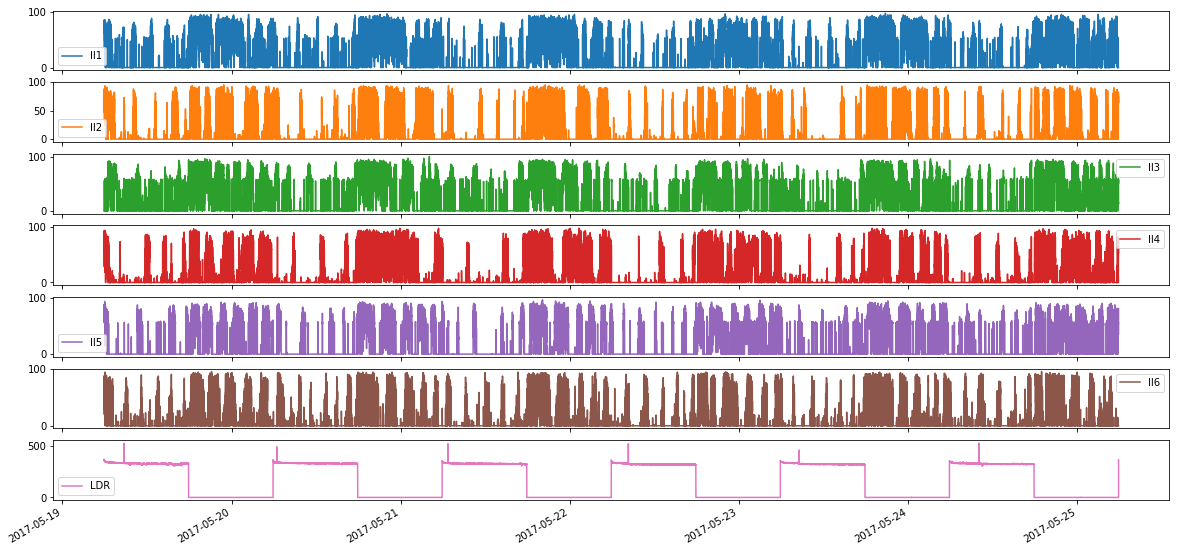

In [12]:
quickplot(baseline_data)

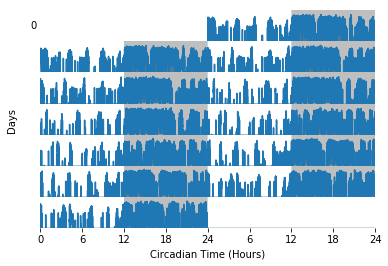

In [13]:
act.actogram_plot_from_df(baseline_data, 0)

In [14]:
# set the light_period_column 
data_annotated.loc[baseline_start:baseline_end,
                   label_col] = "Baseline"

In [15]:
# Disrupted period 
disrupted_start = "2017-5-25 05:54:00"
disrupted_end = "2017-07-07 05:54:00"
disrupted_data = data.loc[disrupted_start:disrupted_end]

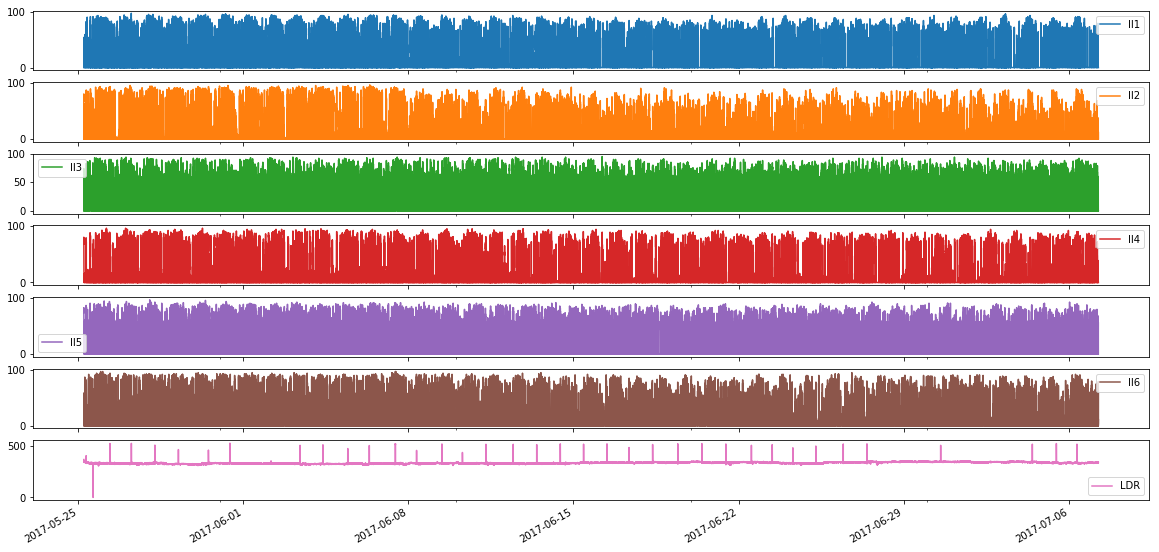

In [16]:
quickplot(disrupted_data)

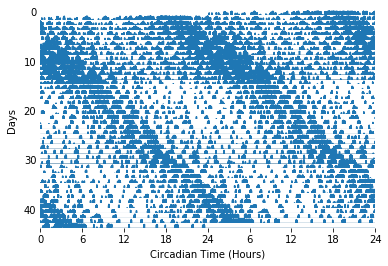

In [17]:
act.actogram_plot_from_df(disrupted_data, 0)

In [18]:
data_annotated.loc[disrupted_start:disrupted_end,
                   label_col] = "Disrupted"

In [19]:
post_baseline_start = "2017-07-07 05:54:00"
post_baseline_end = "2017-07-28 05:54:00"
post_baseline_data = data.loc[post_baseline_start:
                              post_baseline_end]

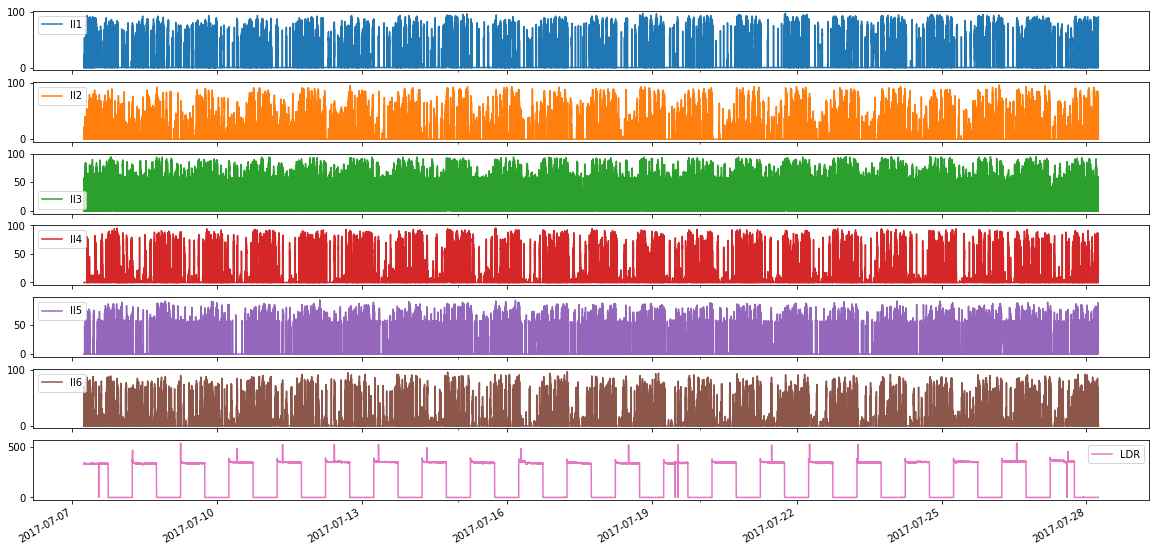

In [20]:
quickplot(post_baseline_data)

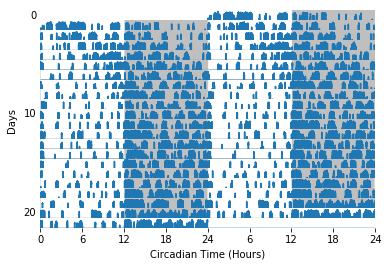

In [21]:
act.actogram_plot_from_df(post_baseline_data,0)

In [22]:
data_annotated.loc[post_baseline_start:post_baseline_end,
                   label_col] = "Recovery"

In [23]:
dd_start = "2017-07-28 05:54:00"
dd_end = "2017-8-10 05:54:00"
dd_data = data.loc[dd_start:dd_end]

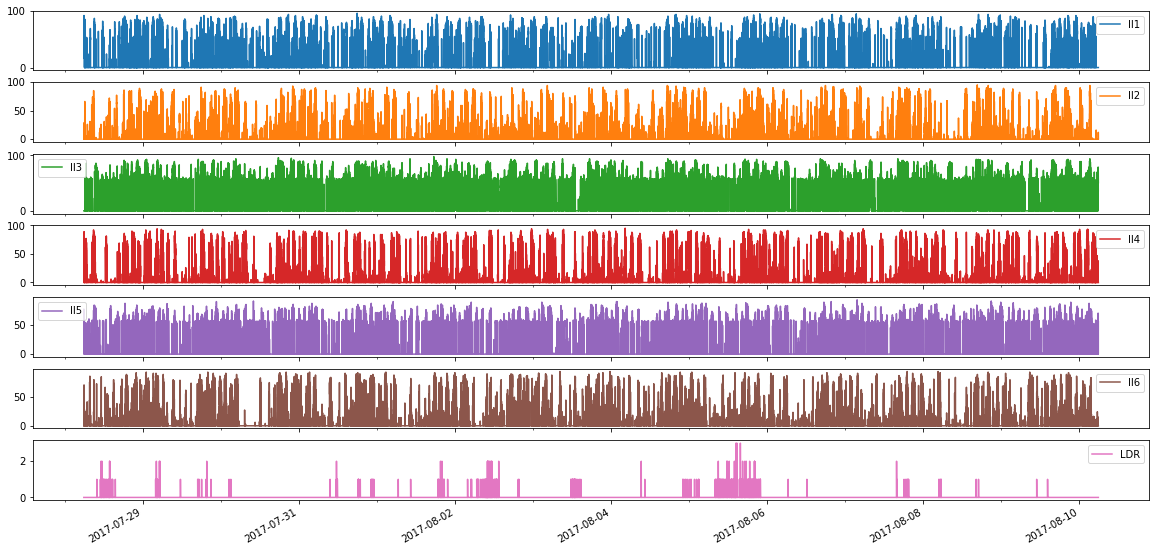

In [24]:
quickplot(dd_data)

act.actogram_plot_from_df(dd_data,0)

In [25]:
data_annotated.loc[dd_start:dd_end,
                   label_col] = "post_dd"

In [26]:
data_reset = data_annotated.reset_index()
index_to_use = [data_reset.columns[-1], data_reset.columns[0]]
data_reset.set_index(index_to_use, inplace=True) 

In [27]:
save_dir = pathlib.Path("/Users/angusfisk/Documents/01_PhD_files/"
                        "01_projects/01_thesisdata/02_circdis/"
                        "01_data_files/01_activity")
file_name = "LL.csv"
file_path = save_dir / file_name
data_reset.to_csv(file_path)

### Bonus extra

Plot the actogram for just the parts we are interested in

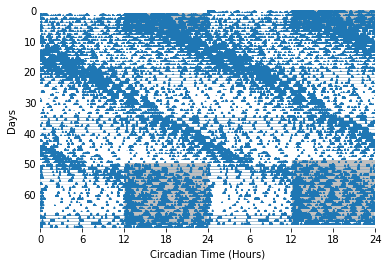

In [28]:
df_act_plot = data.loc[baseline_start:
                       post_baseline_end]
act.actogram_plot_from_df(df_act_plot, 0)